In [22]:
import torch
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
import torch.nn as nn
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"{device=}")

device=device(type='cuda', index=0)


In [23]:
image = plt.imread("piano.jpeg")
image_tensor = torch.tensor(image)
image_tensor.shape

torch.Size([594, 500, 3])

In [52]:
x = image_tensor.shape[0]
y = image_tensor.shape[1]
size = min(x, y)

# crop to square
image_tensor = image_tensor[:size, :size, :3]
#normalize:

image_tensor = image_tensor / torch.max(image_tensor)

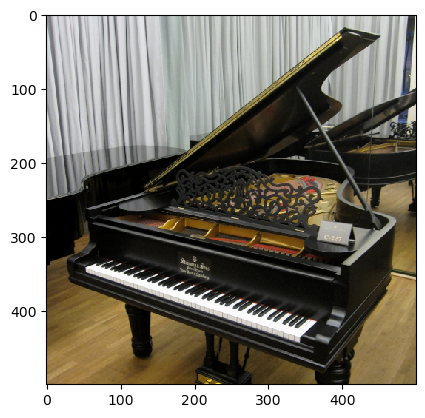

In [53]:
plt.imshow(image_tensor)

In [62]:
numberOfFor = 5
model = nn.Sequential(
	nn.Linear(2*numberOfFor, 300),
	nn.ReLU(),
	nn.Linear(300, 300),
	nn.ReLU(),
	nn.Linear(300, 300),
	nn.ReLU(),
	nn.Linear(300, 300),
	nn.ReLU(),
	nn.Linear(300, 3),
	nn.Sigmoid(),
)
model  = model.to(device)

In [63]:
import math

X = torch.tensor(
	[[
		math.sin(math.pi * 2**i * x/size) for i in range(numberOfFor)
	] +
	[
		math.cos(math.pi * 2**i * y/size) for i in range(numberOfFor)
	]
	for x in range(size) for y in range(size)], device=device)



Y = torch.tensor([image_tensor[x,y].tolist() for x in range(size) for y in range(size)], device=device)

print(X.shape)
print(Y.shape)


torch.Size([250000, 10])
torch.Size([250000, 3])


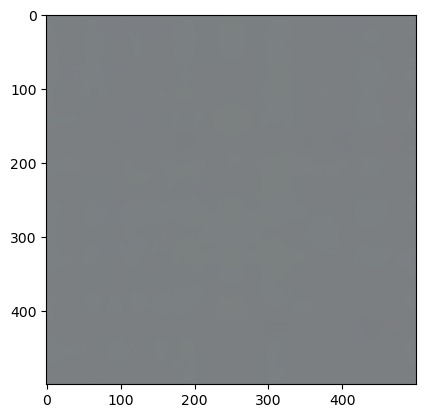

In [64]:
def get_image():
	with torch.no_grad():
		# output = torch.zeros((size, size, 3))
		output = model(X)
		output = output.reshape(size, size, 3)
		output = output.to("cpu")
		return output


image  = get_image()
plt.imshow(image)

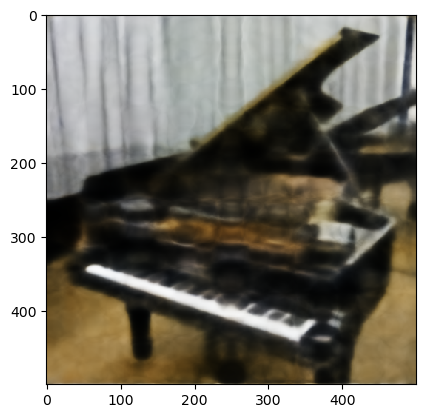

Loss is 0.008294874802231789:  58%|█████▊    | 576/1000 [02:38<01:57,  3.62it/s]


KeyboardInterrupt: 

In [65]:
epochs = 1000
from tqdm import tqdm
from IPython.display import clear_output
def loss_fn(output, target):
		loss = torch.mean((output - target)**2)
		return loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

pbar = tqdm(range(epochs))
# pbar = range(epochs)

image_display = None

fig = plt.figure()
ax = fig.gca()
for n in pbar:
    preds = model(X)
    loss = loss_fn(preds, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    pbar.set_description( f"Loss is {loss}")

    if(n % 10 == 0):
        clear_output()
        image  = get_image()
        plt.imshow(image)
        # if not image_display:
            # image_display = ax.imshow(image)
            # image_display = plt.imshow(image)
            # plt.show()
        # image_display.set_data(image)
        plt.show()
        # fig.canvas.draw()
        # fig.show()
        # image_display.draw()
		

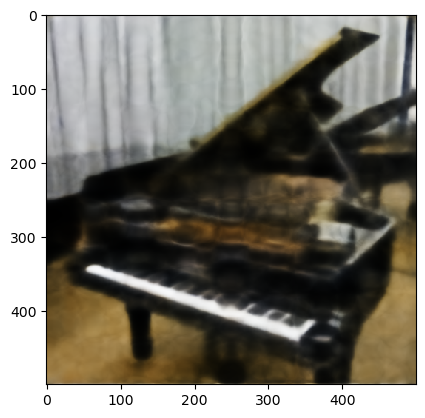

In [66]:
image  = get_image()
plt.imshow(image)